In [155]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
import copy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.utils import shuffle

In [156]:
data = pd.read_csv('seebeck and thermal - targets data - elemental - features.xlsx - Sheet1.csv')
data

formula  temperature(K)  sum_Atomic_Number  \
0     BiSb(Se0.92Br0.08)3             300             236.24   
1     BiSb(Se0.92Br0.08)3             400             236.24   
2     BiSb(Se0.92Br0.08)3             500             236.24   
3     BiSb(Se0.92Br0.08)3             600             236.24   
4     BiSb(Se0.92Br0.08)3             700             236.24   
...                   ...             ...                ...   
5200           Ge9Sb2Te12             423            1014.00   
5201           Ge9Sb2Te12             525            1014.00   
5202           Ge9Sb2Te12             625            1014.00   
5203           Ge9Sb2Te12             725            1014.00   
5204           Ge9Sb2Te12             827            1014.00   

      sum_Atomic_Weight  sum_Mendeleev_Number  sum_l_quantum_number  \
0             567.84693                439.44                   5.0   
1             567.84693                439.44                   5.0   
2             567.84693                439.44                   5.0   
3             567.84693                439.44                   5.0   
4             567.84693                439.44                   5.0   
...                 ...                   ...                   ...   
5200         2428.21000               1961.00                  23.0   
5201         2428.21000               1961.00                  23.0   
5202         2428.21000               1961.00                  23.0   
5203         2428.21000               1961.00                  23.0   
5204         2428.21000               1961.00                  23.0   

      sum_Atomic_Radius  sum_Covalent_Radius  sum_Pauling_Electronegativity  \
0                5.8284               6.3152                        11.8184   
1                5.8284               6.3152                        11.8184   
2                5.8284               6.3152                        11.8184   
3                5.8284               6.3152                        11.8184   
4                5.8284               6.3152                        11.8184   
...                 ...                  ...                            ...   
5200            28.6700              29.9400                        47.3900   
5201            28.6700              29.9400                        47.3900   
5202            28.6700              29.9400                        47.3900   
5203            28.6700              29.9400                        47.3900   
5204            28.6700              29.9400                        47.3900   

      sum_number_of_valence_electrons  ...  sum_Boiling_Point_(K)  \
0                               28.24  ...               6780.462   
1                               28.24  ...               6780.462   
2                               28.24  ...               6780.462   
3                               28.24  ...               6780.462   
4                               28.24  ...               6780.462   
...                               ...  ...                    ...   
5200                           118.00  ...              47530.050   
5201                           118.00  ...              47530.050   
5202                           118.00  ...              47530.050   
5203                           118.00  ...              47530.050   
5204                           118.00  ...              47530.050   

      sum_Density_(g/mL)  sum_specific_heat_(J/g_K)_  \
0                30.4092                     1.32672   
1                30.4092                     1.32672   
2                30.4092                     1.32672   
3                30.4092                     1.32672   
4                30.4092                     1.32672   
...                  ...                         ...   
5200            136.1400                     5.70000   
5201            136.1400                     5.70000   
5202            136.1400                     5.70000   
5203            136.1400                     5.70000   
52

In [157]:
columns_to_exclude = ['formula','seebeck_coefficient' ,'Thermal_conductivity','electrical_conductivity(S/m)']
X = data.drop(columns=columns_to_exclude)
X

temperature(K)  sum_Atomic_Number  sum_Atomic_Weight  \
0                300             236.24          567.84693   
1                400             236.24          567.84693   
2                500             236.24          567.84693   
3                600             236.24          567.84693   
4                700             236.24          567.84693   
...              ...                ...                ...   
5200             423            1014.00         2428.21000   
5201             525            1014.00         2428.21000   
5202             625            1014.00         2428.21000   
5203             725            1014.00         2428.21000   
5204             827            1014.00         2428.21000   

      sum_Mendeleev_Number  sum_l_quantum_number  sum_Atomic_Radius  \
0                   439.44                   5.0             5.8284   
1                   439.44                   5.0             5.8284   
2                   439.44                   5.0             5.8284   
3                   439.44                   5.0             5.8284   
4                   439.44                   5.0             5.8284   
...                    ...                   ...                ...   
5200               1961.00                  23.0            28.6700   
5201               1961.00                  23.0            28.6700   
5202               1961.00                  23.0            28.6700   
5203               1961.00                  23.0            28.6700   
5204               1961.00                  23.0            28.6700   

      sum_Covalent_Radius  sum_Pauling_Electronegativity  \
0                  6.3152                        11.8184   
1                  6.3152                        11.8184   
2                  6.3152                        11.8184   
3                  6.3152                        11.8184   
4                  6.3152                        11.8184   
...                   ...                            ...   
5200              29.9400                        47.3900   
5201              29.9400                        47.3900   
5202              29.9400                        47.3900   
5203              29.9400                        47.3900   
5204              29.9400                        47.3900   

      sum_number_of_valence_electrons  sum_1st_ionization_potential_(kJ/mol)  \
0                               28.24                                4407.76   
1                               28.24                                4407.76   
2                               28.24                                4407.76   
3                               28.24                                4407.76   
4                               28.24                                4407.76   
...                               ...                                    ...   
5200                           118.00                               18954.00   
5201                           118.00                               18954.00   
5202                           118.00                               18954.00   
5203                           118.00                               18954.00   
5204                           118.00                               18954.00   

      sum_Melting_point_(K)  sum_Boiling_Point_(K)  sum_Density_(g/mL)  \
0                  2864.942               6780.462             30.4092   
1                  2864.942               6780.462             30.4092   
2                  2864.942               6780.462             30.4092   
3                  2864.942               6780.462             30.4092   
4                  2864.942               6780.462             30.4092   
...                     ...                    ...                 ...   
5200              21465.050              47530.050            136.1400   
5201              21465.050              47530.050            136.1400   
5202              21465.050              47530.050          

In [158]:
y = data['electrical_conductivity(S/m)']
y

0        27766.0
1        23883.0
2        20850.0
3        19000.0
4        17925.0
          ...   
5200    173636.0
5201    136364.0
5202    120000.0
5203    108182.0
5204     95455.0
Name: electrical_conductivity(S/m), Length: 5205, dtype: float64

In [159]:
X, y = shuffle(X, y, random_state=83)

In [160]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge, Lasso

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Standardize features
scaler = MinMaxScaler((0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=0.01)  # You can adjust the regularization strength (alpha) as needed
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Regression MSE:", ridge_mse)

# Lasso Regression
lasso = Lasso(alpha=0.01)  # You can adjust the regularization strength (alpha) as needed
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regression MSE:", lasso_mse)


Ridge Regression MSE: 189354047563.346
Lasso Regression MSE: 188272501423.35992


E:\Softwares\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.185e+15, tolerance: 1.102e+12
  model = cd_fast.enet_coordinate_descent(


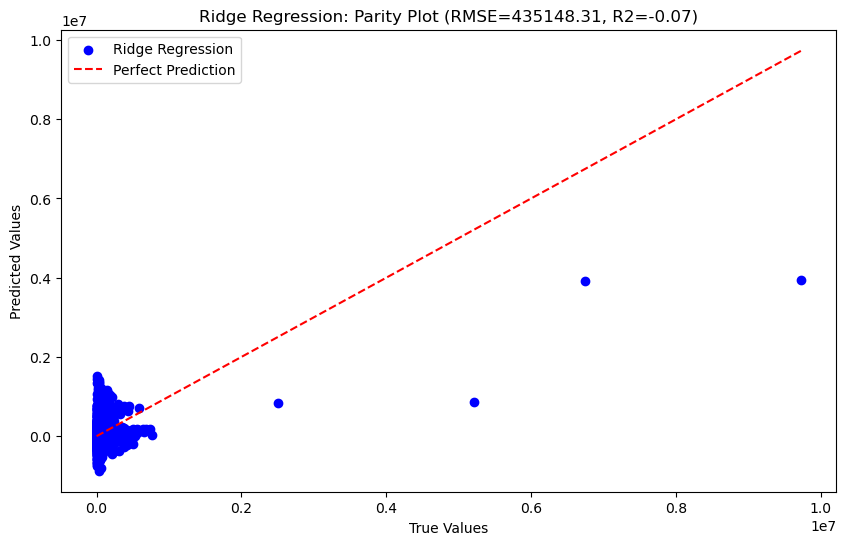

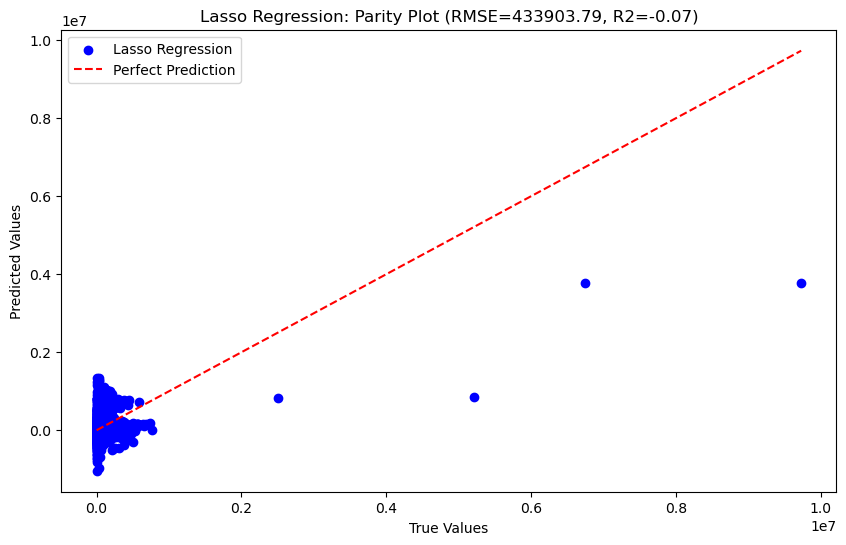

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def plot_parity(y_true, y_pred, model_name, rmse, r2):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', label=f'{model_name}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'{model_name}: Parity Plot (RMSE={rmse:.2f}, R2={r2:.2f})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot parity plot for Ridge Regression
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_pred)
plot_parity(y_test, ridge_pred, f'Ridge Regression', ridge_rmse, ridge_r2)

# Plot parity plot for Lasso Regression
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, lasso_pred)
plot_parity(y_test, lasso_pred, f'Lasso Regression', lasso_rmse, lasso_r2)
